## 1 Importing Libraries Required

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [2]:
#supressing the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Leads.csv")   #importing data set

In [4]:
df.head(5)        

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 2 Inspectng the data set

In [5]:
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [8]:
df.isnull().mean()*100   # checking for null values

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

* checking for value counts in the following columns

In [9]:
df['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [10]:
df['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [11]:
df['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [12]:
df['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [13]:
df['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [14]:
#checking for duplicate columns

In [15]:
sum(df.duplicated(subset = 'Prospect ID'))==0

True

In [16]:
sum(df.duplicated(subset = 'Lead Number'))==0

True

## 3 Data Cleaning

In [17]:
# Dropping column with only 1 value for all customers

columns1= ['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

#The columns in column1 has only 1 value as checked during data inspection. So, its uniform for all the customers. So these columns cant be a deciding factor
#whether the lead will convert or not

df.drop(columns1,axis=1,inplace=True)


In [18]:
# Dropping the columns having unique values

columns2=['Lead Number','Prospect ID']   # these columns have all unique values and can be dropped
df.drop(columns2,axis=1,inplace=True)

In [19]:
# There are few columns with 'select' as an entry. 'Select' represent the option is not chosen by the customer, 
#hence can be replaced with nan values

#Replacing 'Select' values with Nan
df=df.replace("Select", np.nan)

In [20]:
# checking null values in the columns
df.isnull().mean()*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [21]:
# Dropping columns with more than 35% missing values

for i in df.columns:
    if df[i].isnull().mean()*100>=35:
        df.drop(i,axis=1,inplace=True)
    else:
        pass
    

In [22]:
# Removing columns where there is data imbalance

In [23]:
#checking data imbalance in the following columns
columns4=['Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
          'A free copy of Mastering The Interview'
         ]

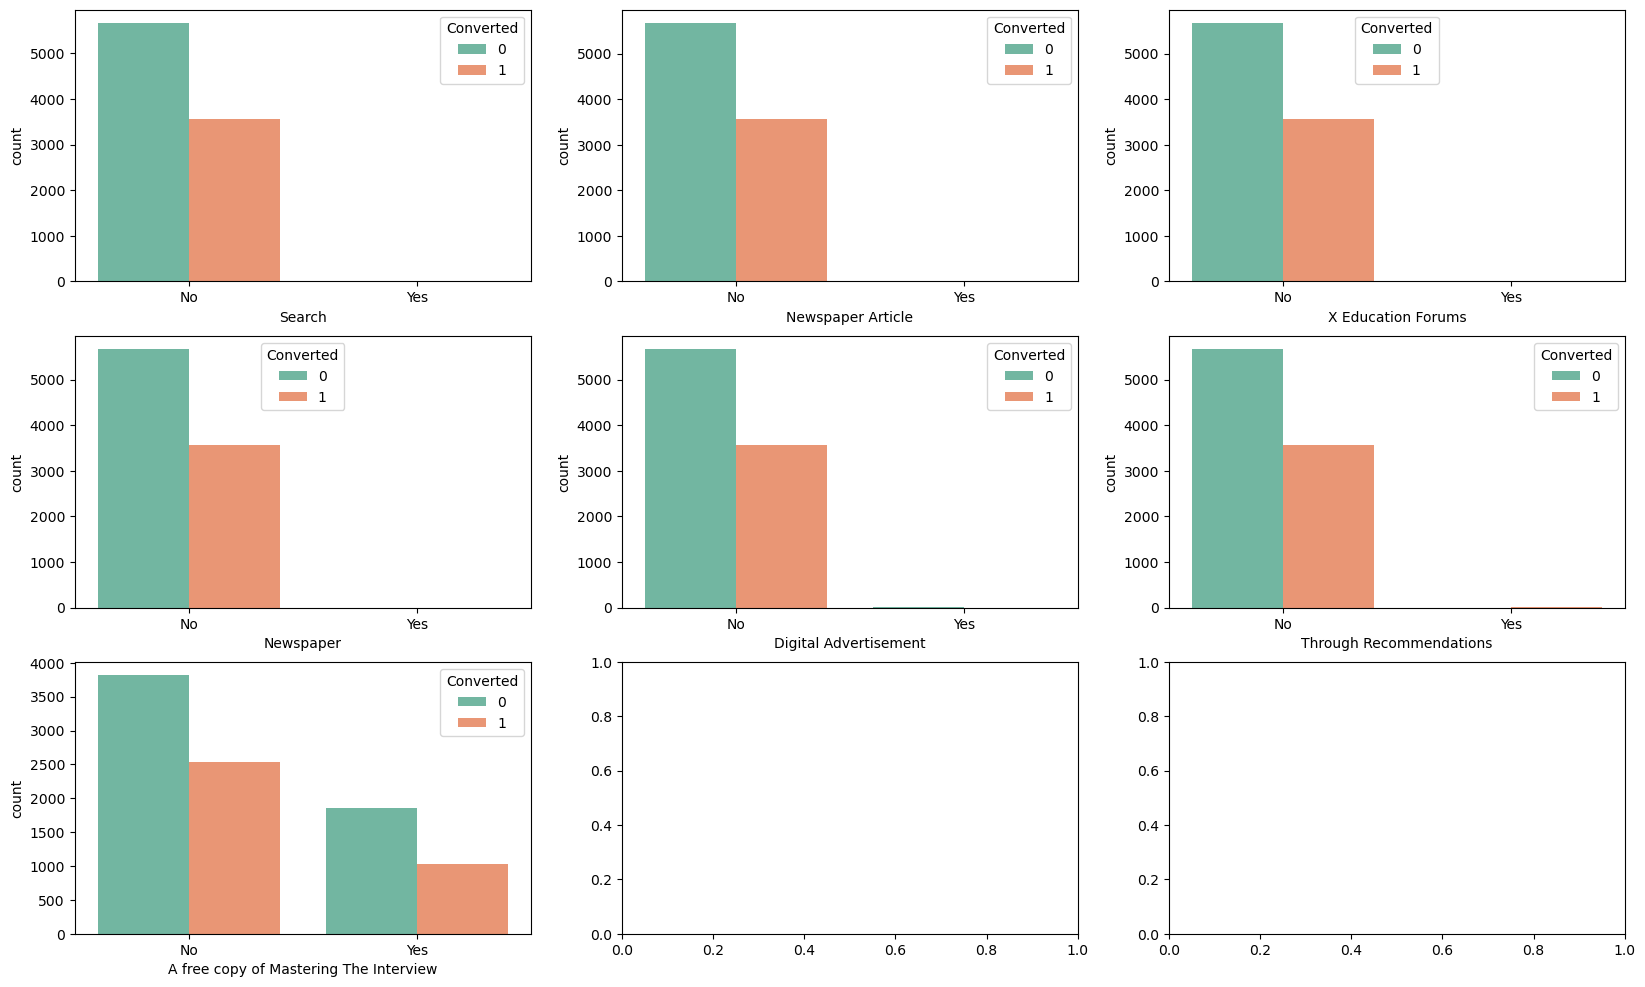

In [24]:

#Plotting the columns listed in the set columns4 to check the number of conversions 


fig, axs = plt.subplots(3,3,figsize = (20,12))
sns.countplot(x = "Search", hue = "Converted", data = df, ax = axs[0,0],palette = 'Set2')
sns.countplot(x = "Newspaper Article", hue = "Converted", data = df, ax = axs[0,1],palette = 'Set2')
sns.countplot(x = "X Education Forums", hue = "Converted", data =df, ax = axs[0,2],palette = 'Set2')
sns.countplot(x = "Newspaper", hue = "Converted", data =df, ax = axs[1,0],palette = 'Set2')
sns.countplot(x = "Digital Advertisement", hue = "Converted", data =df, ax = axs[1,1],palette = 'Set2')
sns.countplot(x = "Through Recommendations", hue = "Converted", data =df, ax = axs[1,2],palette = 'Set2')
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = df, ax = axs[2,0],palette = 'Set2')
plt.show()

* Except the column 'A free copy of Mastering The Interview', all other columns in columns4 have data imbalance 
* Dropping all columns in columns4 except 'A free copy of Mastering The Interview' 

In [25]:
# removing  'A free copy of Mastering The Interview' from columns4 to create  list columns5
columns5=['Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations']

In [26]:
#dropping columns5 from our data set
df.drop(columns5,axis=1,inplace=True)

In [27]:
df['Country'].value_counts(normalize=True)*100  # checking percentage of each country in the country column

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

* 'Country' column has highly skewed vales. 95% of the data has country India
* Dropping the country column

In [28]:
df.drop('Country',axis=1, inplace=True)

In [29]:
df.columns   # checcking the columns in the data frame now.

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### 3.1 Imputation of the remaining missing values

In [30]:
df.isna().mean()*100   # checking missing values in the columns

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
A free copy of Mastering The Interview            0.000000
Last Notable Activity                             0.000000
dtype: float64

In [31]:
#checking the values in 'Lead Source' column
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

We see there are entries Google and google. They both represent the same thing.

In [32]:
# Replacing 'google' with 'Google' as they represent the same thing

df['Lead Source'].replace('google','Google',inplace=True)    

In [33]:
# replacing nan values with most occured value given by the mode value of the column

df['Lead Source'].fillna(df['Lead Source'].mode()[0],inplace=True)

In [34]:
df['TotalVisits'] # checking the 'TotalVisits' column

0       0.0
1       5.0
2       2.0
3       1.0
4       2.0
       ... 
9235    8.0
9236    2.0
9237    2.0
9238    3.0
9239    6.0
Name: TotalVisits, Length: 9240, dtype: float64

<AxesSubplot:xlabel='TotalVisits'>

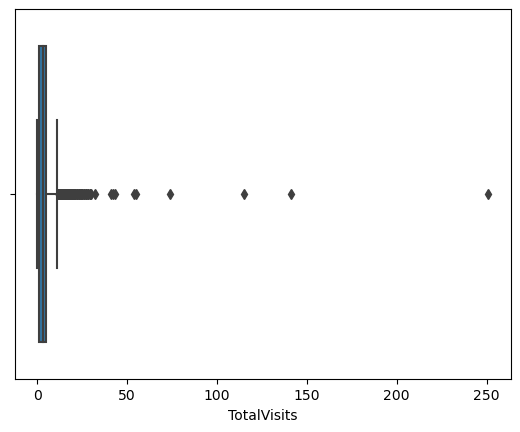

In [35]:
sns.boxplot(df['TotalVisits'])

'TotalVisits' is a numerical column.

In [36]:
#checking the values in 'TotalVisits' column

df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [37]:
# replacing missing values in TotalVisits column by median of the column, since the column has outliers
df['TotalVisits'].fillna(df['TotalVisits'].median(),inplace=True)

In [38]:
# describing the numerical column 'Page Views Per Visit' 
df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:xlabel='Page Views Per Visit'>

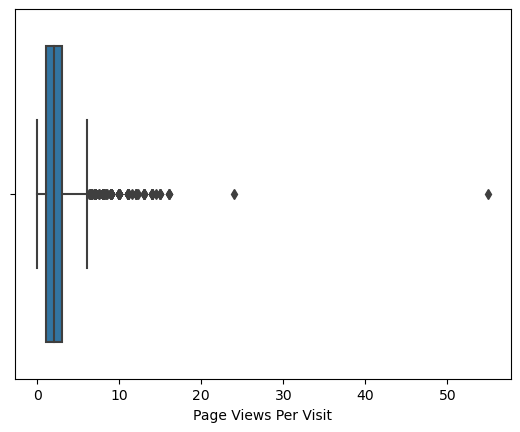

In [39]:
sns.boxplot(df['Page Views Per Visit'])

In [40]:
# replacing missing values in Page Views Per Visit column by median of the column, since the column has outliers

df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(),inplace=True)

In [41]:
# Checking value counts in 'What matters most to you in choosing a course' column
df['What matters most to you in choosing a course'].value_counts(dropna=False,normalize=True)

Better Career Prospects      0.706494
NaN                          0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

We see 70% of the column has 'Better Career Prospects' . And there are 30% approx missing values. 
Replacing the missing values with the most occured values 'Better Career Prospects' would misguide the insight we draw from the data

In [42]:
# dropping the column 'What matters most to you in choosing a course' column
df.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [43]:
# checking 'Last Notable Activity' column
df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [44]:
# Putting all the entries with value counts less than or equal 60 into 'others'

In [45]:
df['Last Notable Activity'] =df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

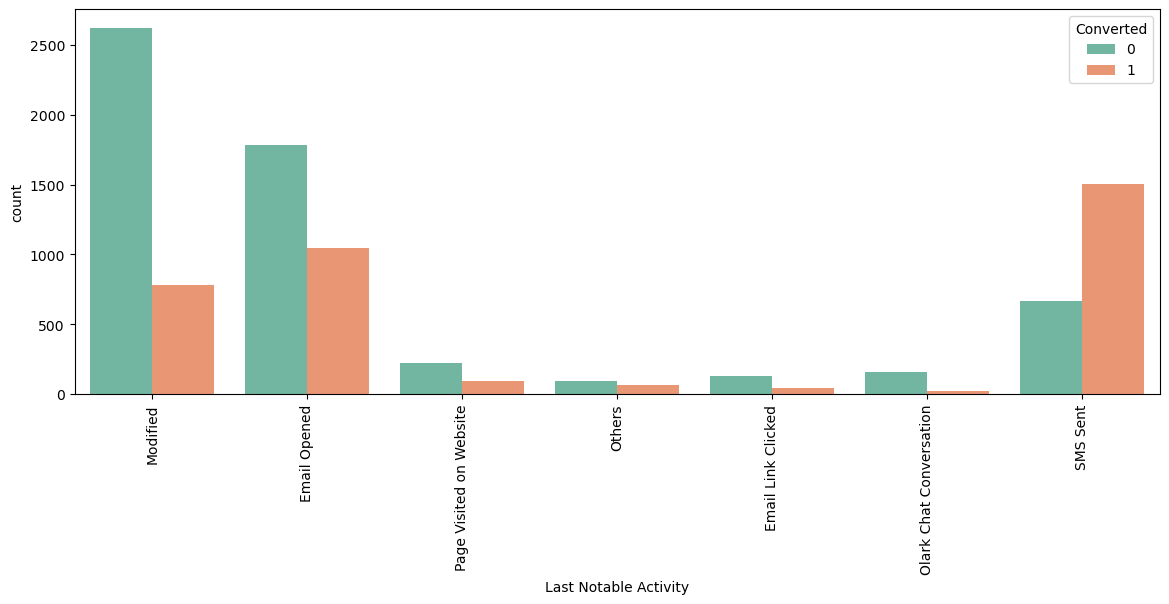

In [46]:
#visualizing count of Variable based on Converted value in 'Last Notable Activity' column

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data =df , palette = 'Set2')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [47]:
# not able to draw any valuable insights from the column so dropping it.
df.drop('Last Notable Activity',axis=1,inplace=True)

In [48]:
# checking the value counts of 'Lead Source' column
df['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [49]:
# Putting all the entries with value counts less than or equal 60 into 'others'
df['Lead Source'] =df['Lead Source'].replace(['NC_EDM',
                                               'testone',
                                                'youtubechannel',
                                                'welearnblog_Home',
                                                'WeLearn',                                                                    
                                                'blog',
                                                'Pay per Click Ads',
                                                 'Press_Release', 
                                                'Live Chat', 
                                              'Click2call',
                                              'bing',
                                              'Facebook',
                                                'Social Media'],'Others')

In [50]:
#checking the 'Last Activity' column
df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

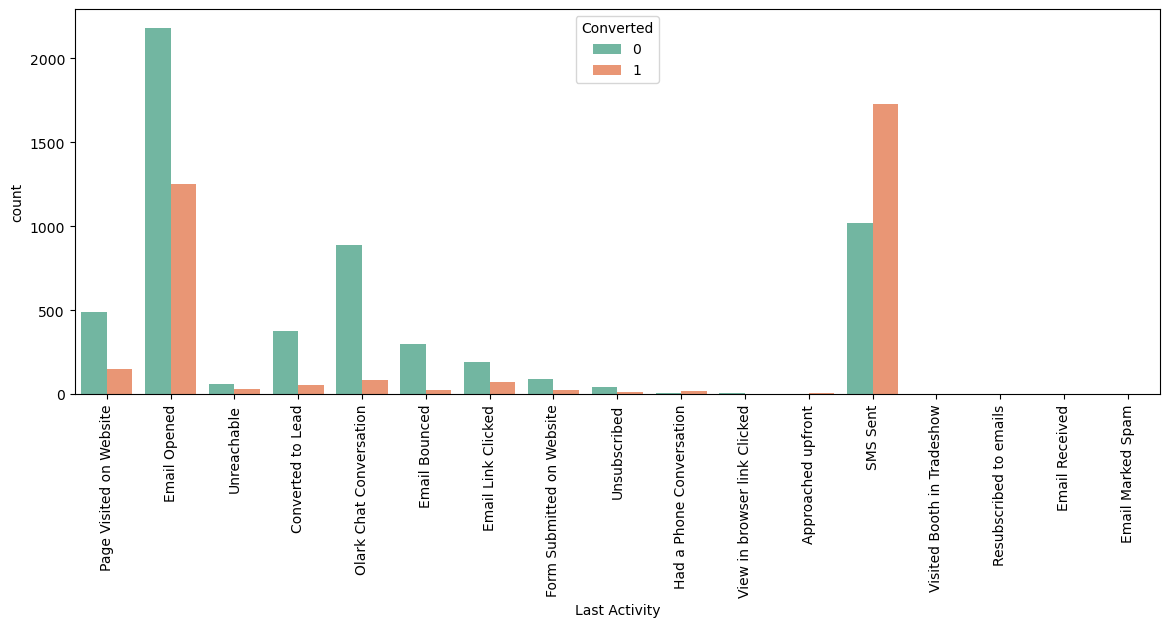

In [51]:
#visualizing count of Variable based on Converted value in 'Last Notable Activity' column

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Activity", hue = "Converted", data =df , palette = 'Set2')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [52]:
# not able to draw any valuable insign=hts from the column so dropping it.
df=df.drop('Last Activity',axis=1) 

In [53]:
# our data is cleaned for further analysis, lets check the columns we are left with
df.columns  

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'What is your current occupation',
       'A free copy of Mastering The Interview'],
      dtype='object')

## 4 Visualising the data

### Univariate Analysis

**Lead Origin**

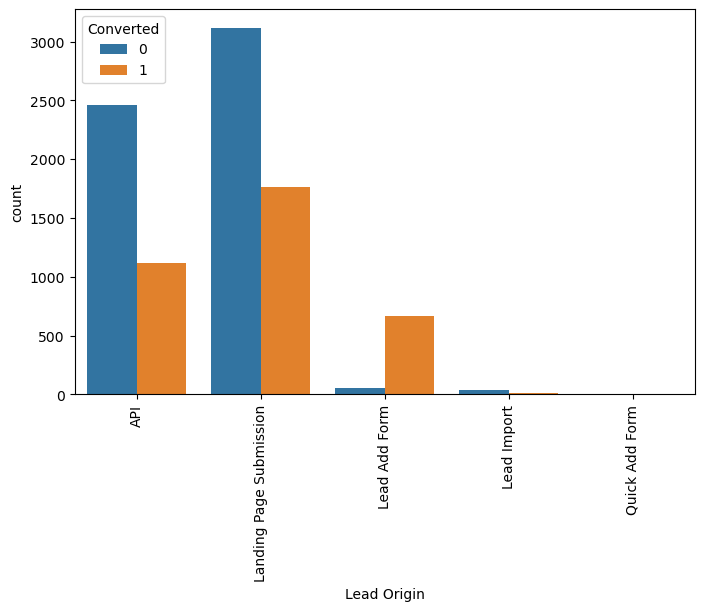

In [54]:
plt.figure(figsize=(8,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = df)
xticks(rotation = 90)
plt.show()

API and Landing Page Submission have lower conversion rate conversion rate than Lead Add Form

Lead Import are very less in count.

**Lead Source**

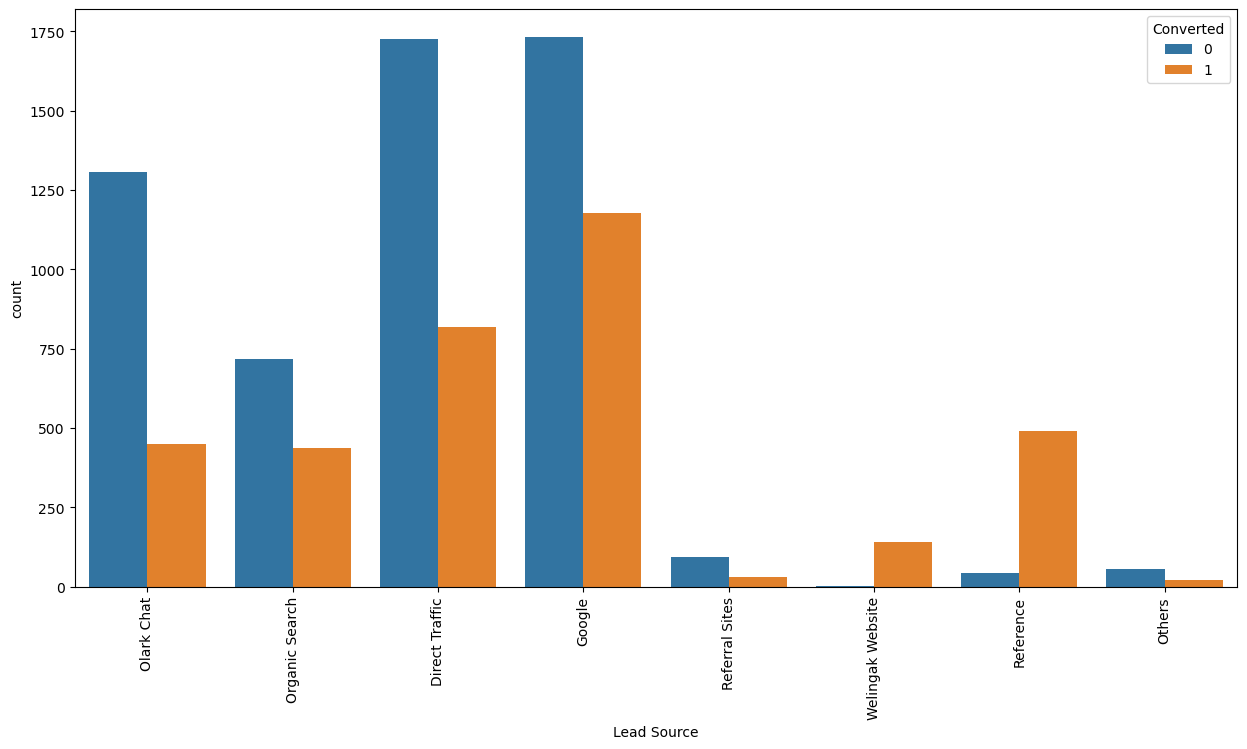

In [55]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
xticks(rotation = 90)
plt.show()

Google and Direct traffic generates maximum number of leads.

Conversion Rate of reference leads and leads through welingak website is high.

**Do Not Email & Do Not Call**

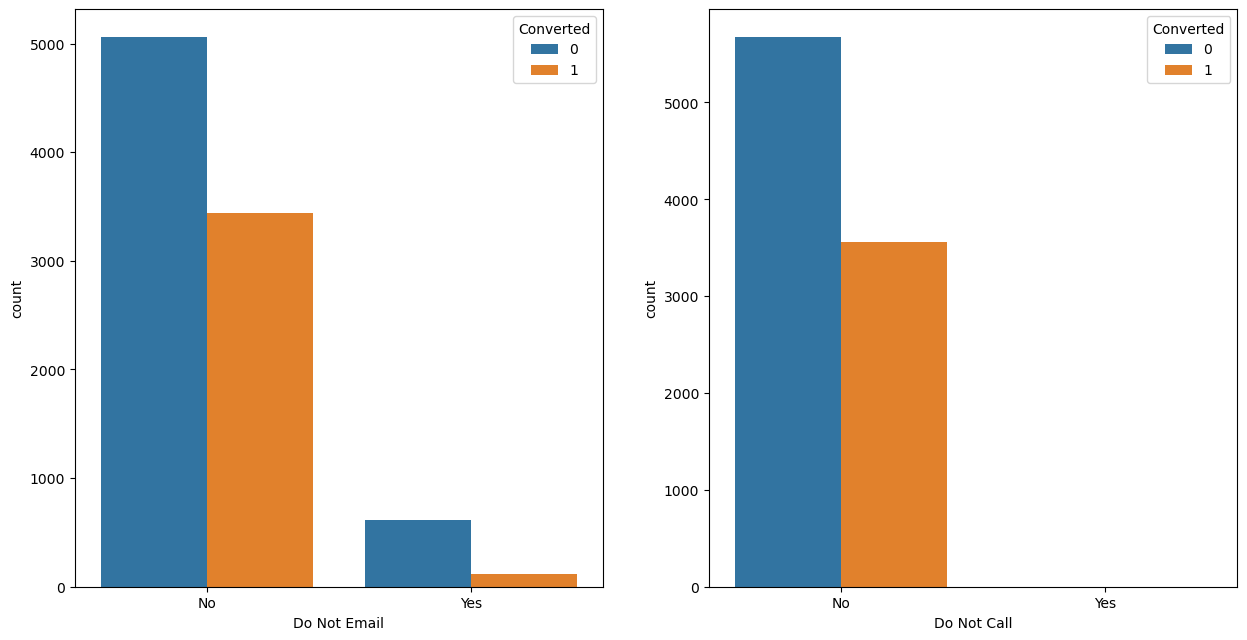

In [56]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = df, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = df, ax = axs[1])
plt.show()

NUMERICAL COLUMNS

<AxesSubplot:xlabel='TotalVisits'>

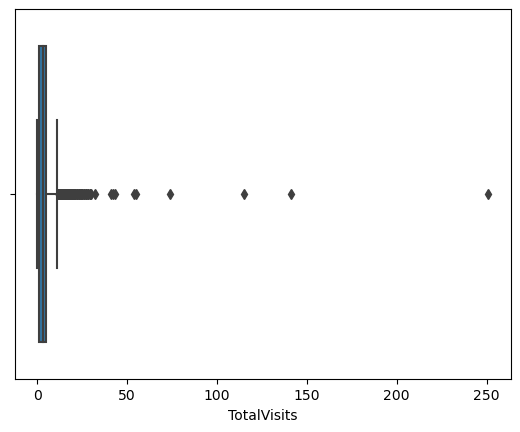

In [57]:
sns.boxplot(df['TotalVisits'])

<AxesSubplot:xlabel='TotalVisits', ylabel='Density'>

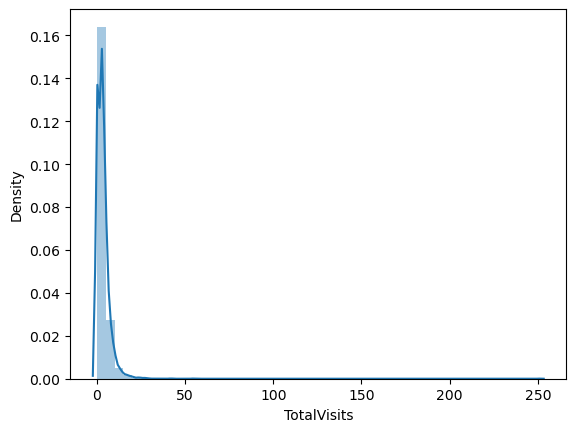

In [58]:
sns.distplot(df['TotalVisits'])

* cleraly we can this the column total visits has outliers


<AxesSubplot:xlabel='Total Time Spent on Website'>

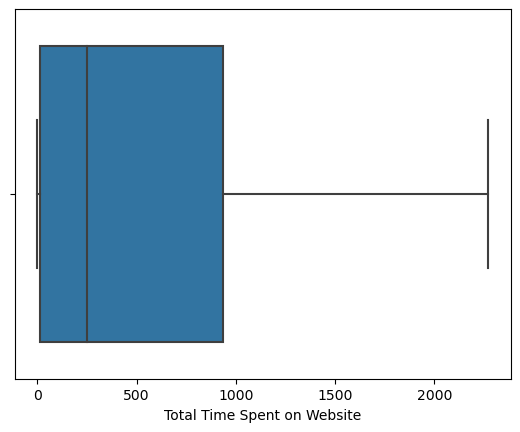

In [59]:
sns.boxplot(df['Total Time Spent on Website'])

<AxesSubplot:xlabel='Page Views Per Visit'>

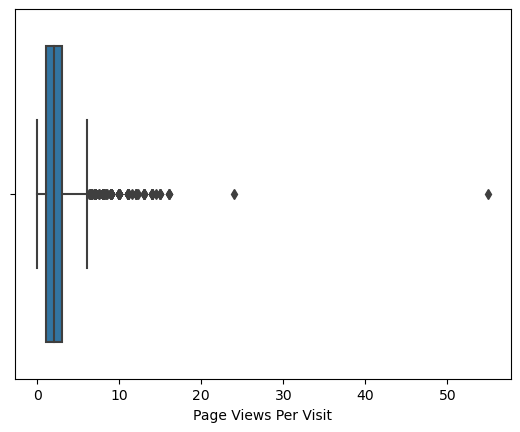

In [60]:
sns.boxplot(df['Page Views Per Visit'])

<AxesSubplot:xlabel='Page Views Per Visit', ylabel='Density'>

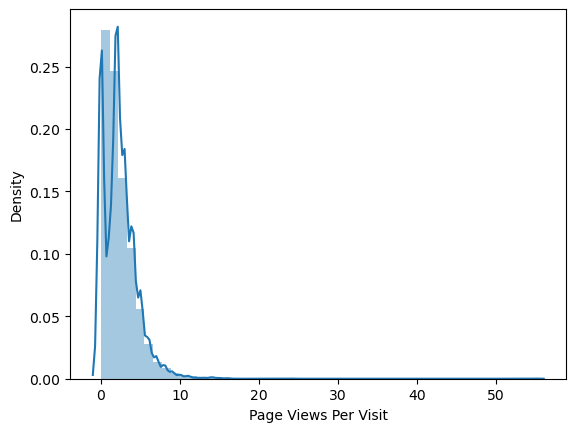

In [61]:
sns.distplot(df['Page Views Per Visit'])

* we can clearly see there are outliers in pages per visit

## 5 Data Preparation


In [62]:
# creating a copy of our data set before creating the dummy variable
df1=df.copy()

In [63]:
#converting 'yes' to 1 and 'no' to 0 in the columns :'Do Not Email','Do Not Call','A free copy of Mastering The Interview'

df1['Do Not Email']=df1["Do Not Email"].apply(lambda x:1 if x=='Yes' else 0)
df1['Do Not Call']=df1["Do Not Call"].apply(lambda x:1 if x=='Yes' else 0)
df1['A free copy of Mastering The Interview']=df1["A free copy of Mastering The Interview"].apply(lambda x:1 if x=='Yes' else 0)

### 5.1 Dummy Variable creation

In [64]:
#listing out the columns with data type as object
column6=df1.select_dtypes(include=['object']).columns     
column6

Index(['Lead Origin', 'Lead Source', 'What is your current occupation'], dtype='object')

In [65]:
df1['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [66]:
df1['Lead Source'].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                78
Name: Lead Source, dtype: int64

In [67]:
df1['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [68]:
#creating dummy variables for the columns listed in column6


dummy1=pd.get_dummies(df1['Lead Origin'],drop_first=True)
df1=pd.concat([df1,dummy1],axis=1)

dummy2=pd.get_dummies(df1['Lead Source'],prefix='Lead Source')
dummy2.drop('Lead Source_Others',axis=1,inplace=True)
df1=pd.concat([df1,dummy2],axis=1)

dummy3=pd.get_dummies(df1['What is your current occupation'],prefix='current occup')
dummy3.drop('current occup_Other',axis=1,inplace=True)
df1=pd.concat([df1,dummy3],axis=1)

In [69]:
df1.head(3)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,A free copy of Mastering The Interview,...,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,current occup_Businessman,current occup_Housewife,current occup_Student,current occup_Unemployed,current occup_Working Professional
0,API,Olark Chat,0,0,0,0.0,0,0.0,Unemployed,0,...,1,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Unemployed,0,...,0,1,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Student,1,...,0,0,0,0,0,0,0,1,0,0


In [70]:
# since we have created the dummy variables the columns 'Lead Origin','Lead Source','What is your current occupation' are not required 
df1.drop(['Lead Origin','Lead Source','What is your current occupation'],axis=1,inplace=True)

In [71]:
df1.head(3)

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,...,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,current occup_Businessman,current occup_Housewife,current occup_Student,current occup_Unemployed,current occup_Working Professional
0,0,0,0,0.0,0,0.0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,1,2.0,1532,2.0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### 5.2 Train Test split

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
# splitting the data set into training set and testing set. 'Converted' column is our target variable
X=df1.drop('Converted', axis=1)
y=df1['Converted']

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

### 5.3 Feature Scaling

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
#using standard scaler for scaling the features
scaler=StandardScaler()
num_cols=X_train.select_dtypes(include=['float64','int64']).columns   # collecting the list of columns to be scaled

In [77]:
num_cols

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [78]:
X_train[num_cols]=scaler.fit_transform(X_train[num_cols])

In [79]:
X_train.head(3) 

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,...,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,current occup_Businessman,current occup_Housewife,current occup_Student,current occup_Unemployed,current occup_Working Professional
5321,-0.294786,-0.011632,0.107319,-0.455314,0.752283,-0.676536,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2575,-0.294786,-0.011632,-0.681054,-0.891900,-1.090163,-0.676536,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3363,-0.294786,-0.011632,-0.286868,-0.396859,-0.168940,1.478118,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
# checking the Lead conversion rate
LDR=round((df1['Converted'].sum()/len(df1))*100,2)
LDR

38.54

### Looking for correlations

<AxesSubplot:>

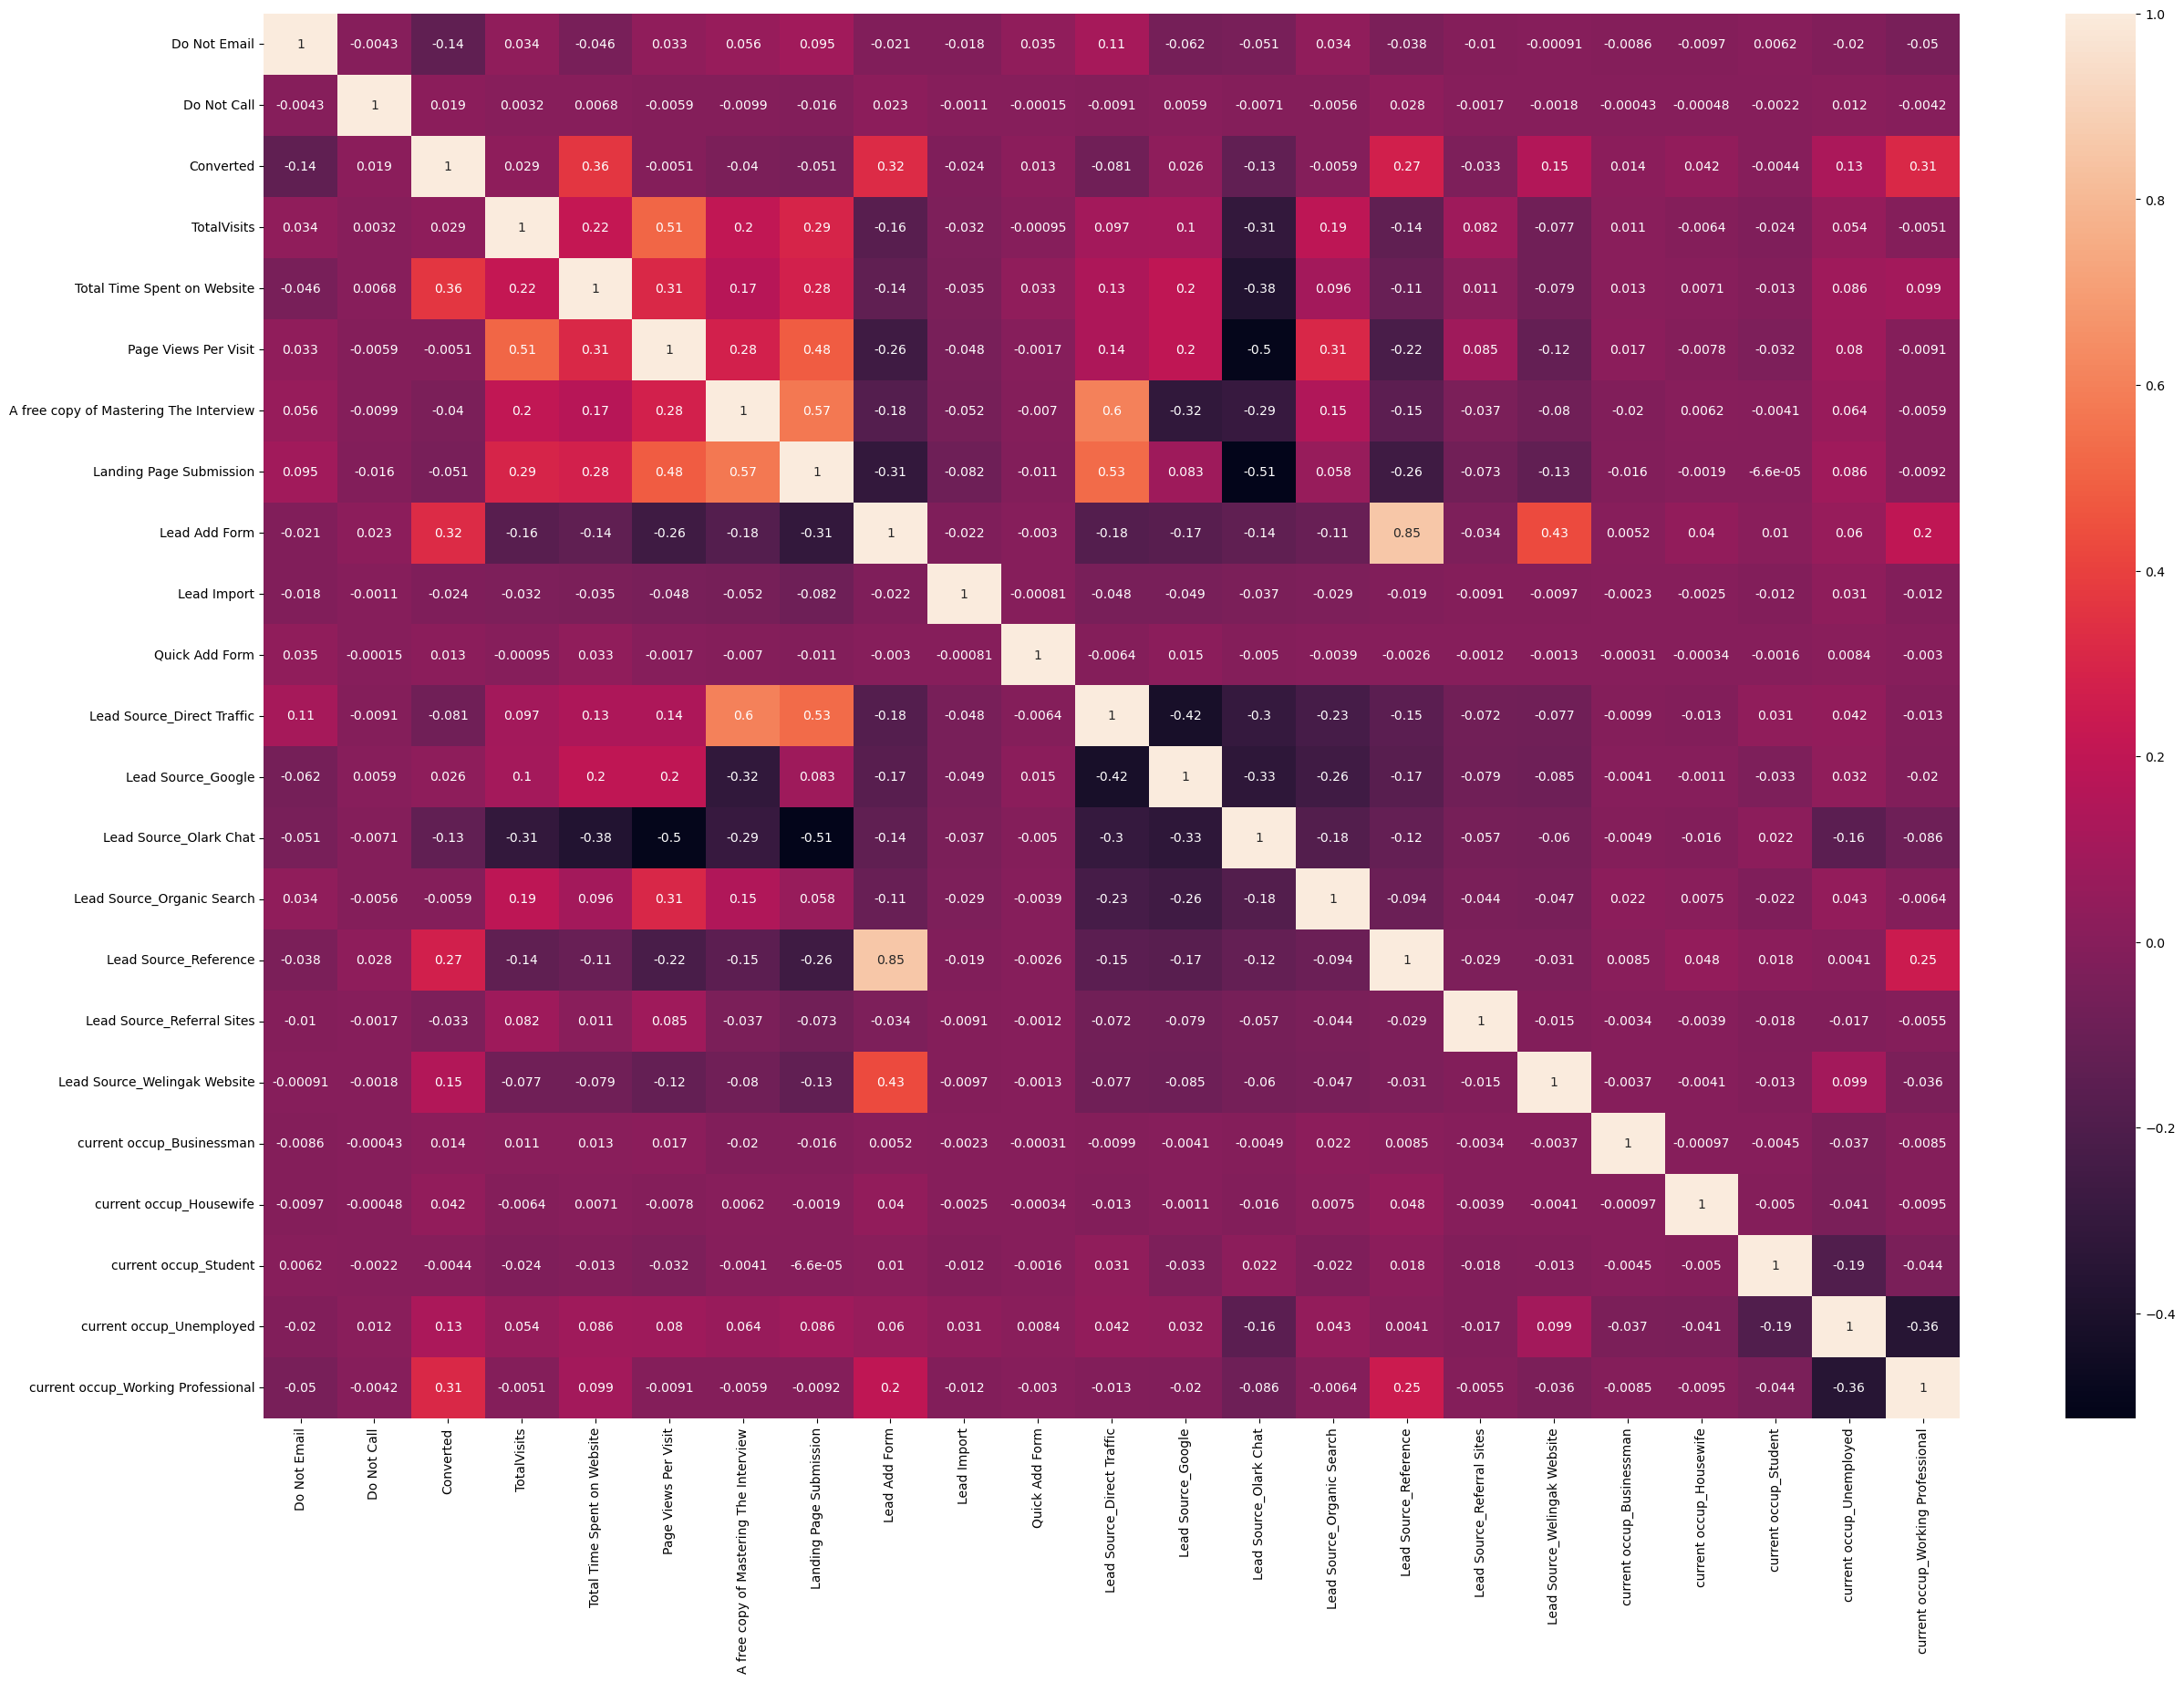

In [81]:
plt.figure(figsize = (30,20)) 
sns.heatmap(df1.corr(), annot=True)  # checking the correlation between the columns in the dataframe

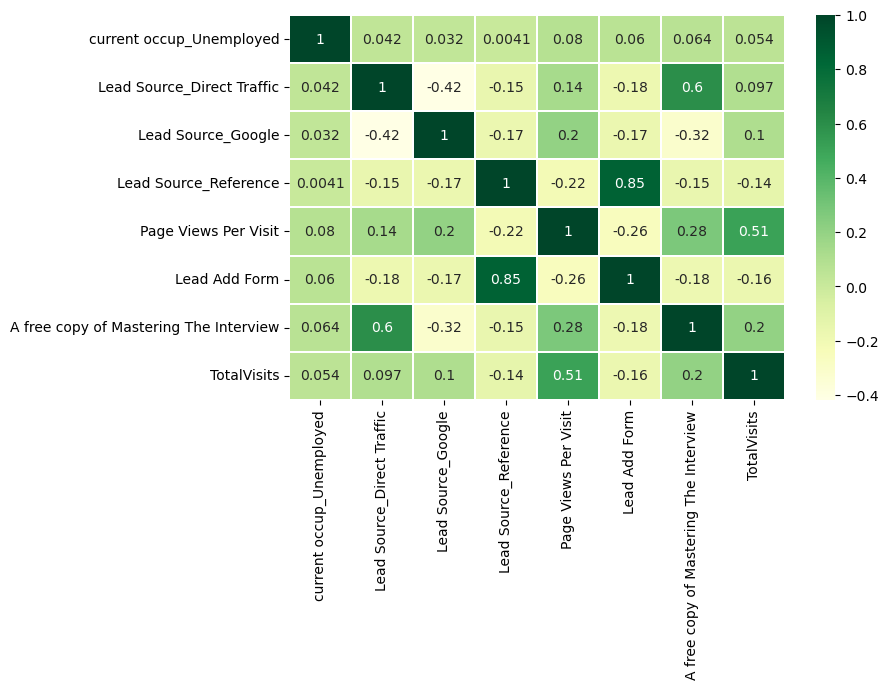

In [82]:
# Breaking down suspected variables which migh have high correlation with each other

plt.figure(figsize = (8,5))        
sns.heatmap(df1[['current occup_Unemployed','Lead Source_Direct Traffic','Lead Source_Google','Lead Source_Reference',
                       'Page Views Per Visit', 'Lead Add Form','A free copy of Mastering The Interview','TotalVisits']].corr(), linewidths=0.01, cmap="YlGn", annot=True)
plt.show()

**Inference:**
* 'Lead Add Form' has high correlation with 'Lead Source_Reference'
* 'Lead Source_Direct Traffic' has high correlation with 'A free copy of Mastering The Interview'

# 6.Model Building

### Feature Selection Using RFE (Recursive Feature Elimination)

In [83]:
logreg = LogisticRegression()    #creating a Logistic Regression Class
# running RFE with 13 variables as output
rfe = RFE(logreg, n_features_to_select=13)            
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_))

[('Do Not Email', True),
 ('Do Not Call', False),
 ('TotalVisits', False),
 ('Total Time Spent on Website', True),
 ('Page Views Per Visit', False),
 ('A free copy of Mastering The Interview', False),
 ('Landing Page Submission', False),
 ('Lead Add Form', True),
 ('Lead Import', False),
 ('Quick Add Form', False),
 ('Lead Source_Direct Traffic', True),
 ('Lead Source_Google', False),
 ('Lead Source_Olark Chat', True),
 ('Lead Source_Organic Search', False),
 ('Lead Source_Reference', True),
 ('Lead Source_Referral Sites', True),
 ('Lead Source_Welingak Website', True),
 ('current occup_Businessman', True),
 ('current occup_Housewife', True),
 ('current occup_Student', True),
 ('current occup_Unemployed', True),
 ('current occup_Working Professional', True)]

# Logistic Regression model 1 

In [84]:
#columns selected by RFE
x_cols=X_train.columns[rfe.support_]

In [85]:
x_cols

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'current occup_Businessman',
       'current occup_Housewife', 'current occup_Student',
       'current occup_Unemployed', 'current occup_Working Professional'],
      dtype='object')

In [86]:
# creating a dataframe from X_train, containg columns recommended by RFE
X_train_rfe=X_train[x_cols]

In [87]:
# adding a constant column to the dataframe X_train_rfe
X_train_sm1=sm.add_constant(X_train_rfe)

# Creating a fitted model
model1=sm.GLM(y_train,X_train_sm1,family=sm.families.Binomial()).fit()

# summary of logistic regression model
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7378
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3347.1
Date:                Tue, 18 Jul 2023   Deviance:                       6694.1
Time:                        10:36:26   Pearson chi2:                 8.25e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3466
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.9685      0.077    -25.405      0.000      -2.120      -1.817
Do Not Email                          -0.3018      0.039     -7.819      0.000      -0.377      -0.226
Total Time Spent on Website            1.0975      0.036     30.781      0.000       1.028       1.167
Lead Add Form                          3.0698      0.483      6.357      0.000       2.123       4.016
Lead Source_Direct Traffic            -0.3054      0.074     -4.154      0.000      -0.449      -0.161
Lead Source_Olark Chat                 0.8479      0.092      9.219      0.000       0.668       1.028
Lead Source_Reference                  0.2340      0.510      0.458      0.647      -0.766       1.234
Lead Source_Referral Sites            -0.6382      0.299     -2.132      0.033      -1.225      -0.051
Lead Source_Welingak Website           2.6487      0.860      3.079      0.002       0.963       4.335
current occup_Businessman              1.4723      0.984      1.497      0.134      -0.455       3.400
current occup_Housewife               22.7631   1.56e+04      0.001      0.999   -3.06e+04    3.06e+04
current occup_Student                  1.0015      0.200      5.017      0.000       0.610       1.393
current occup_Unemployed               1.2475      0.076     16.308      0.000       1.098       1.397
current occup_Working Professional     3.7051      0.176     21.049      0.000       3.360       4.050
======================================================================================================
"""

In [88]:
# calculating VIFs for variables

def VIFCalc(modelDF):
    vif = pd.DataFrame()
    vif['Features'] = modelDF.columns
    vif['VIF'] = [variance_inflation_factor(modelDF.values, i) for i in range(modelDF.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    vif = vif.reset_index(drop=True)
    return vif

# Now checking VIFs for all variables in the Logistic Regression Model 1
VIFCalc(X_train_rfe)

,Features,VIF
0,Lead Add Form,18.20
1,Lead Source_Reference,14.39
2,Lead Source_Welingak Website,4.66
3,current occup_Unemployed,1.60
4,Lead Source_Direct Traffic,1.38
5,Lead Source_Olark Chat,1.34
6,Total Time Spent on Website,1.26
7,current occup_Working Professional,1.20
8,current occup_Student,1.04
9,Do Not Email,1.03


**Inference**
* 'Lead Add Form' and 'Lead Source_Reference' has high vif value which shows multicolinearity
* 'Lead Source_Reference' ,'current occup_Businessman', 'current occup_Housewife' has high pvalue

**dropping 'Lead Source_Reference' column and creating the model again**

# Logistic regression model 2

In [89]:
# dropping the column 'Lead Source_Reference' and creating the model again
x_cols=x_cols.drop('Lead Source_Reference')

X_train_rfe=X_train[x_cols]
X_train_rfe

# adding a constant column to the dataframe X_train_rfe
X_train_sm2=sm.add_constant(X_train_rfe)

# Creating a fitted model
model2=sm.GLM(y_train,X_train_sm2,family=sm.families.Binomial()).fit()

# summary of logistic regression model
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7379
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3347.2
Date:                Tue, 18 Jul 2023   Deviance:                       6694.3
Time:                        10:36:27   Pearson chi2:                 8.23e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3466
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.9686      0.077    -25.405      0.000      -2.121      -1.817
Do Not Email                          -0.3031      0.039     -7.865      0.000      -0.379      -0.228
Total Time Spent on Website            1.0974      0.036     30.779      0.000       1.028       1.167
Lead Add Form                          3.2771      0.177     18.463      0.000       2.929       3.625
Lead Source_Direct Traffic            -0.3053      0.074     -4.153      0.000      -0.449      -0.161
Lead Source_Olark Chat                 0.8477      0.092      9.216      0.000       0.667       1.028
Lead Source_Referral Sites            -0.6383      0.299     -2.132      0.033      -1.225      -0.051
Lead Source_Welingak Website           2.4425      0.735      3.322      0.001       1.002       3.883
current occup_Businessman              1.4721      0.984      1.497      0.134      -0.456       3.400
current occup_Housewife               22.7684   1.56e+04      0.001      0.999   -3.06e+04    3.07e+04
current occup_Student                  1.0017      0.200      5.018      0.000       0.610       1.393
current occup_Unemployed               1.2473      0.076     16.306      0.000       1.097       1.397
current occup_Working Professional     3.7064      0.176     21.061      0.000       3.361       4.051
======================================================================================================
"""

In [90]:
# calculating VIFs for variables

def VIFCalc(modelDF):
    vif = pd.DataFrame()
    vif['Features'] = modelDF.columns
    vif['VIF'] = [variance_inflation_factor(modelDF.values, i) for i in range(modelDF.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    vif = vif.reset_index(drop=True)
    return vif

# Now checking VIFs for all variables in the Logistic Regression Model 2
VIFCalc(X_train_rfe)

,Features,VIF
0,current occup_Unemployed,1.60
1,Lead Add Form,1.58
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Olark Chat,1.34
4,Lead Source_Welingak Website,1.29
5,Total Time Spent on Website,1.26
6,current occup_Working Professional,1.20
7,current occup_Student,1.04
8,Do Not Email,1.02
9,Lead Source_Referral Sites,1.01


**Inference**
* 'current occup_Housewife' has high p value of 0.99. which shows the column is statistically insignificant

**dropping 'current occup_Housewife' column and creating the model again**

# Logistic regression model 3

In [91]:
# dropping the column 'current occup_Housewife' and creating the model again
x_cols=x_cols.drop('current occup_Housewife')

X_train_rfe=X_train[x_cols]
X_train_rfe

# adding a constant column to the dataframe X_train_rfe
X_train_sm3=sm.add_constant(X_train_rfe)

# Creating a fitted model
model3=sm.GLM(y_train,X_train_sm3,family=sm.families.Binomial()).fit()

# summary of logistic regression model
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7380
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3353.2
Date:                Tue, 18 Jul 2023   Deviance:                       6706.4
Time:                        10:36:27   Pearson chi2:                 8.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3455
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.9498      0.077    -25.338      0.000      -2.101      -1.799
Do Not Email                          -0.3045      0.039     -7.893      0.000      -0.380      -0.229
Total Time Spent on Website            1.0986      0.036     30.834      0.000       1.029       1.168
Lead Add Form                          3.3128      0.177     18.673      0.000       2.965       3.661
Lead Source_Direct Traffic            -0.3096      0.073     -4.213      0.000      -0.454      -0.166
Lead Source_Olark Chat                 0.8418      0.092      9.163      0.000       0.662       1.022
Lead Source_Referral Sites            -0.6441      0.299     -2.152      0.031      -1.231      -0.058
Lead Source_Welingak Website           2.4081      0.735      3.275      0.001       0.967       3.849
current occup_Businessman              1.4550      0.984      1.479      0.139      -0.473       3.383
current occup_Student                  0.9835      0.200      4.926      0.000       0.592       1.375
current occup_Unemployed               1.2290      0.076     16.175      0.000       1.080       1.378
current occup_Working Professional     3.6878      0.176     20.977      0.000       3.343       4.032
======================================================================================================
"""

In [92]:
# calculating VIFs for variables

def VIFCalc(modelDF):
    vif = pd.DataFrame()
    vif['Features'] = modelDF.columns
    vif['VIF'] = [variance_inflation_factor(modelDF.values, i) for i in range(modelDF.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    vif = vif.reset_index(drop=True)
    return vif

# Now checking VIFs for all variables in the Logistic Regression Model 3
VIFCalc(X_train_rfe)

,Features,VIF
0,current occup_Unemployed,1.60
1,Lead Add Form,1.57
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Olark Chat,1.34
4,Lead Source_Welingak Website,1.28
5,Total Time Spent on Website,1.25
6,current occup_Working Professional,1.20
7,current occup_Student,1.04
8,Do Not Email,1.02
9,Lead Source_Referral Sites,1.01


**Inference**
* 'current occup_Businessman' has p value of 0.13. which shows the column is statistically insignificant

**dropping the 'current occup_Businessman' column**

# Logistic regression model 4

In [93]:
# dropping the column 'current occup_Businessman' and creating the model again
x_cols=x_cols.drop('current occup_Businessman')

X_train_rfe=X_train[x_cols]
X_train_rfe

# adding a constant column to the dataframe X_train_rfe
X_train_sm4=sm.add_constant(X_train_rfe)

# Creating a fitted model
model4=sm.GLM(y_train,X_train_sm4,family=sm.families.Binomial()).fit()

# summary of logistic regression model
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7381
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3354.2
Date:                Tue, 18 Jul 2023   Deviance:                       6708.4
Time:                        10:36:27   Pearson chi2:                 8.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3453
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.9437      0.077    -25.324      0.000      -2.094      -1.793
Do Not Email                          -0.3048      0.039     -7.903      0.000      -0.380      -0.229
Total Time Spent on Website            1.0990      0.036     30.852      0.000       1.029       1.169
Lead Add Form                          3.3128      0.177     18.673      0.000       2.965       3.660
Lead Source_Direct Traffic            -0.3100      0.073     -4.219      0.000      -0.454      -0.166
Lead Source_Olark Chat                 0.8411      0.092      9.155      0.000       0.661       1.021
Lead Source_Referral Sites            -0.6459      0.299     -2.159      0.031      -1.232      -0.059
Lead Source_Welingak Website           2.4085      0.735      3.276      0.001       0.967       3.850
current occup_Student                  0.9778      0.200      4.899      0.000       0.587       1.369
current occup_Unemployed               1.2231      0.076     16.137      0.000       1.075       1.372
current occup_Working Professional     3.6821      0.176     20.953      0.000       3.338       4.027
======================================================================================================
"""

In [94]:
# calculating VIFs for variables

def VIFCalc(modelDF):
    vif = pd.DataFrame()
    vif['Features'] = modelDF.columns
    vif['VIF'] = [variance_inflation_factor(modelDF.values, i) for i in range(modelDF.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    vif = vif.reset_index(drop=True)
    return vif

# Now checking VIFs for all variables in the Logistic Regression Model - 4
VIFCalc(X_train_rfe)

,Features,VIF
0,current occup_Unemployed,1.60
1,Lead Add Form,1.57
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Olark Chat,1.33
4,Lead Source_Welingak Website,1.28
5,Total Time Spent on Website,1.25
6,current occup_Working Professional,1.20
7,current occup_Student,1.04
8,Do Not Email,1.02
9,Lead Source_Referral Sites,1.01


* 1 all the variables in our model 4 have vif less 5, which shows there is no multi collinearity between the variables.
* 2 all the variables in our model 4 have p value less 0.05, which shows they are statistically significant.
* 3 Based on these findings, we have selected Logistic Regression Model  4 as our final model for making predictions.

# 7. Model Evaluation

making predictions on the training set

In [95]:
y_pred=model4.predict(X_train_sm4).values.reshape(-1)   # Probablity of convertion for the training set

In [96]:
y_pred[:10]

array([0.24395077, 0.84577407, 0.06913575, 0.10391355, 0.04957766,
       0.63254181, 0.16357638, 0.37453222, 0.2435807 , 0.11993747])

In [97]:
# Creating a dataframe with "Converted" column and probablity predicted of conversion

train_predicts= pd.DataFrame({'Converted':y_train,'prob_conversion':y_pred})
train_predicts['prob_conversion']=round(train_predicts['prob_conversion'],2)
train_predicts['Prospects ID']= X_train.index

In [98]:
train_predicts

,Converted,prob_conversion,Prospects ID
5321,0,0.24,5321
2575,1,0.85,2575
3363,0,0.07,3363
955,0,0.10,955
6406,0,0.05,6406
...,...,...,...
2895,0,0.35,2895
7813,0,0.25,7813
905,0,0.26,905
5192,0,0.33,5192


In [99]:
# Putting the probablities greater than 0.5 as converted(1) and values less than 1 as not_converted(0)
train_predicts['Predicted']=train_predicts['prob_conversion'].apply(lambda x:0 if x<=0.5 else 1)

### confusion matrix

In [100]:
#confusion matrix
confusion_matrix=metrics.confusion_matrix(train_predicts['Converted'],train_predicts['Predicted'])

In [101]:
confusion_matrix

array([[4070,  490],
       [1009, 1823]], dtype=int64)

In [102]:

# Actual/Predicted      not_converted      converted  
# not_converted             4070             490
# converted                1009            1823

In [103]:
#calculating Accuracy,Sensitivity, Specificity , False Positive Rate ,Precision ,Recall ,Negative Predictive Value

def Con_Mat_Func(confusion_matrix):
    TP = confusion_matrix[1,1] # true positive
    TN = confusion_matrix[0,0] # true negatives
    FP = confusion_matrix[0,1] # false positives
    FN = confusion_matrix[1,0] # false negatives
    
    acc = round((TN+TP) / float(TN+TP+FN+FP), 4)
    sens = round(TP / float(TP+FN), 4)
    spec = round(TN / float(TN+FP), 4)
    fprate = round(FP/ float(TN+FP), 4)
    prec = round(TP / float(TP+FP), 4)
    recal = round(TP / float(TP+FN), 4)
    npval = round(TN / float(TN+ FN), 4)
    
    print('Accuracy                  =', acc)
    print('Sensitivity               =', sens)
    print('Specificity               =', spec)
    print('False Positive Rate       =', fprate)
    print('Precision                 =', prec)
    print('Recall                    =', recal)
    print('Negative Predictive Value =', npval)

In [104]:
Con_Mat_Func(confusion_matrix)

Accuracy                  = 0.7972
Sensitivity               = 0.6437
Specificity               = 0.8925
False Positive Rate       = 0.1075
Precision                 = 0.7882
Recall                    = 0.6437
Negative Predictive Value = 0.8013


### ROC  curve

In [105]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

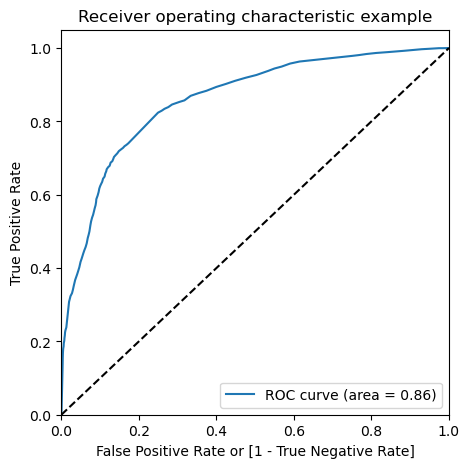

In [106]:
fpr, tpr, thresholds = metrics.roc_curve( train_predicts['Converted'], train_predicts['prob_conversion'],
                                         drop_intermediate = False )
draw_roc(train_predicts['Converted'],train_predicts['prob_conversion'])

### Finding optimal cutoff points

In [107]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    train_predicts[i]= train_predicts['prob_conversion'].map(lambda x: 1 if x > i else 0)
    
train_predicts.head()

,Converted,prob_conversion,Prospects ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
5321,0,0.24,5321,0,1,1,1,0,0,0,0,0,0,0
2575,1,0.85,2575,1,1,1,1,1,1,1,1,1,1,0
3363,0,0.07,3363,0,1,0,0,0,0,0,0,0,0,0
955,0,0.10,955,0,1,0,0,0,0,0,0,0,0,0
6406,0,0.05,6406,0,1,0,0,0,0,0,0,0,0,0


In [108]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(train_predicts['Converted'],train_predicts[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i , accuracy, sensi, speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383117  1.000000  0.000000
0.1   0.1  0.518669  0.980932  0.231579
0.2   0.2  0.700622  0.902189  0.575439
0.3   0.3  0.774892  0.829096  0.741228
0.4   0.4  0.802489  0.703037  0.864254
0.5   0.5  0.797213  0.643715  0.892544
0.6   0.6  0.779627  0.563206  0.914035
0.7   0.7  0.753517  0.457274  0.937500
0.8   0.8  0.732278  0.353107  0.967763
0.9   0.9  0.689665  0.201977  0.992544


<Figure size 1200x600 with 0 Axes>

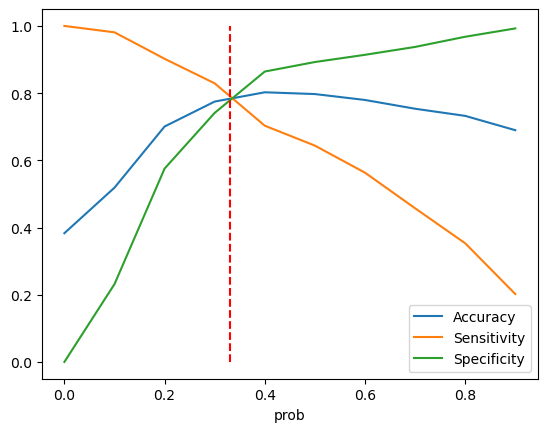

In [109]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize = (12,6))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.legend(labels=['Accuracy','Sensitivity','Specificity'])
plt.vlines(x=0.33,ymax = 1.0,ymin=0.0,color='r',linestyle='--')
plt.show()

In [110]:
#### From the curve above, 0.33(aprox) is the optimum point to take it as a cutoff probability.

In [111]:
# creating a column showing the probablities greater than 0.33 as converted(1) and values less than 1 as not_converted(0)

train_predicts['final_predicted']=train_predicts['prob_conversion'].apply(lambda x:1 if x>0.33 else 0)

In [112]:
# dropping unnecessary columns
train_predicts.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True)

In [113]:
train_predicts

,Converted,prob_conversion,Prospects ID,final_predicted
5321,0,0.24,5321,0
2575,1,0.85,2575,1
3363,0,0.07,3363,0
955,0,0.10,955,0
6406,0,0.05,6406,0
...,...,...,...,...
2895,0,0.35,2895,1
7813,0,0.25,7813,0
905,0,0.26,905,0
5192,0,0.33,5192,0


In [114]:
#creating the confusion matrix
confusion_matrix2=metrics.confusion_matrix(train_predicts['Converted'],train_predicts['final_predicted'])

In [115]:
confusion_matrix2

array([[3795,  765],
       [ 748, 2084]], dtype=int64)

In [116]:
# Actual/Predicted      not_converted      converted  
# not_converted             3795             765
# converted                  748            2084

In [117]:
Con_Mat_Func(confusion_matrix2)

Accuracy                  = 0.7953
Sensitivity               = 0.7359
Specificity               = 0.8322
False Positive Rate       = 0.1678
Precision                 = 0.7315
Recall                    = 0.7359
Negative Predictive Value = 0.8354


# Precision and Recall

In [118]:
# Creating precision-recall tradeoff curve
train_predicts['Converted'], train_predicts['prob_conversion']
preci, recal, thresholds = precision_recall_curve(train_predicts['Converted'], train_predicts['prob_conversion'])

In [119]:
#calculating Precision and Recall
p_score = round(precision_score(train_predicts['Converted'], train_predicts['final_predicted']), 4)
r_score = round(recall_score(train_predicts['Converted'], train_predicts['final_predicted']), 4)

print('Precision score =', p_score)
print('Recall score    =', r_score)

Precision score = 0.7315
Recall score    = 0.7359


In [120]:
# Creating precision-recall tradeoff curve
p, r, thresholds = precision_recall_curve(train_predicts['Converted'],train_predicts['prob_conversion'])

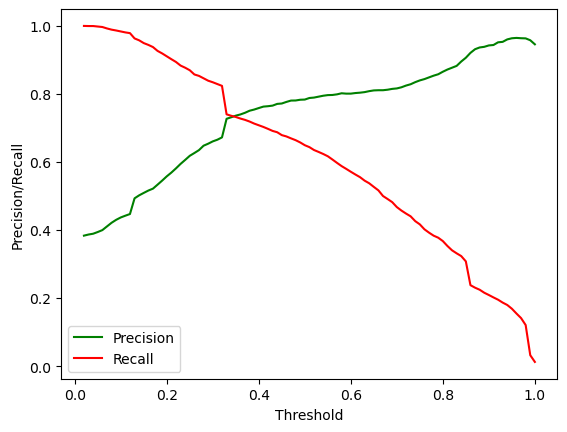

In [121]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")


# add legend and axis labels

plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

**Based on the Precisison recall plot,a threshold of 0.33 provides a good balance between precision and recall**

### predictions on test data

In [122]:
cols=X_test.select_dtypes(['float64','int64']).columns 

In [123]:
cols

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [124]:
X_test[cols] = scaler.transform(X_test[cols]) # scaling the X_test data set 

In [125]:
X_test

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,...,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,current occup_Businessman,current occup_Housewife,current occup_Student,current occup_Unemployed,current occup_Working Professional
2140,-0.294786,-0.011632,-0.681054,-0.891900,-1.090163,-0.676536,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
7707,-0.294786,-0.011632,0.107319,1.853659,-0.168940,-0.676536,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1522,-0.294786,-0.011632,-0.089774,0.978660,-0.399246,1.478118,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1873,-0.294786,-0.011632,-0.286868,-0.552131,-0.168940,-0.676536,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8100,-0.294786,-0.011632,1.881157,2.259190,0.406824,-0.676536,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,-0.294786,-0.011632,0.501505,-0.502809,1.673506,-0.676536,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7173,-0.294786,-0.011632,-0.681054,-0.891900,-1.090163,-0.676536,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
634,-0.294786,-0.011632,-0.286868,-0.846232,-0.168940,1.478118,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4406,-0.294786,-0.011632,-0.681054,-0.891900,-1.090163,-0.676536,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [126]:
X_test = X_test[x_cols]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Add Form,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Referral Sites,Lead Source_Welingak Website,current occup_Student,current occup_Unemployed,current occup_Working Professional
2140,-0.294786,-0.891900,1,0,0,0,0,0,1,0
7707,-0.294786,1.853659,0,1,0,0,0,1,0,0
1522,-0.294786,0.978660,0,1,0,0,0,0,1,0
1873,-0.294786,-0.552131,0,0,0,0,0,0,1,0
8100,-0.294786,2.259190,0,0,0,0,0,0,1,0


In [127]:
# adding a constant value to X_test
X_test_sm=sm.add_constant(X_test)

In [128]:
#Making Prediction for y_test
y_test_predict=model4.predict(X_test_sm)
#converting y_test_predict  into dataframe
y_test_predict=pd.DataFrame(y_test_predict)
# resetting index
y_test_predict.reset_index(drop=True, inplace=True)
y_test_predict

,0
0,0.845774
1,0.700775
2,0.533641
3,0.224865
4,0.864367
...,...
1843,0.234453
1844,0.119937
1845,0.133455
1846,0.845774


In [129]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index


In [130]:
#resetting index for y_test_df
y_test_df.reset_index(drop=True, inplace=True)
y_test_df.head(3)

,Converted,Prospect ID
0,1,2140
1,1,7707
2,1,1522


In [131]:
#concating y_test_df, y_test_predict
y_pred_final=pd.concat([y_test_df,y_test_predict],axis=1)

In [132]:
y_pred_final.head(3)

,Converted,Prospect ID,0
0,1,2140,0.845774
1,1,7707,0.700775
2,1,1522,0.533641


In [133]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [134]:
y_pred_final.head(3)

,Converted,Prospect ID,Converted_Prob
0,1,2140,0.845774
1,1,7707,0.700775
2,1,1522,0.533641


#### ROC CURVE

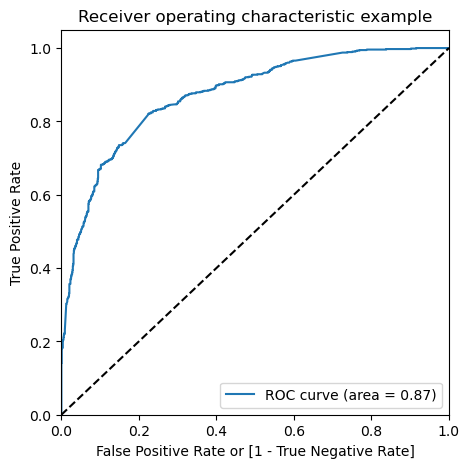

In [135]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final['Converted'], y_pred_final['Converted_Prob'],
                                         drop_intermediate = False )
draw_roc(y_pred_final['Converted'],y_pred_final['Converted_Prob'])

In [136]:
# Taking sensitivity-specificity method at 0.33 probability cutoff during training, and calculating if there is a conversion or not
y_pred_final['conversion_pred']=y_pred_final['Converted_Prob'].apply(lambda x:1 if x>0.33 else 0)

In [137]:
Confusion_fin=metrics.confusion_matrix(y_pred_final['Converted'],y_pred_final['conversion_pred'])
print(Confusion_fin)

[[944 175]
 [192 537]]


In [138]:
Con_Mat_Func(Confusion_fin)

Accuracy                  = 0.8014
Sensitivity               = 0.7366
Specificity               = 0.8436
False Positive Rate       = 0.1564
Precision                 = 0.7542
Recall                    = 0.7366
Negative Predictive Value = 0.831


   ### Adding Lead Score to the y_pred_final data frame

In [139]:
y_pred_final['Lead Score']=y_pred_final['Converted_Prob'].map( lambda x: round(x*100))

In [140]:
y_pred_final.head(3)

,Converted,Prospect ID,Converted_Prob,conversion_pred,Lead Score
0,1,2140,0.845774,1,85
1,1,7707,0.700775,1,70
2,1,1522,0.533641,1,53


In [141]:
y_pred_final.sort_values(by='Lead Score', ascending=False)

,Converted,Prospect ID,Converted_Prob,conversion_pred,Lead Score
1516,1,8063,0.998622,1,100
1135,1,4613,0.998434,1,100
1303,1,79,0.996227,1,100
1330,1,5921,0.999034,1,100
390,1,6751,0.998884,1,100
...,...,...,...,...,...
1180,0,5533,0.018007,0,2
1027,0,573,0.015808,0,2
534,0,6247,0.021539,0,2
1662,0,8772,0.018916,0,2


## Conclusions

**Test Data Set**
* Accuracy:    80.14
* Sensitivity: 73.66
* Specificity : 84.36

**Equation**
* ln(odd)=-1.9437* (const) -0.3048* (Do Not Email)+1.0990* (Total Time Spent on Website)+3.3128*( Lead Add Form) -0.3100* (Lead Source_Direct Traffic)+0.8411* (Lead Source_Olark Chat) -0.6459* (Lead Source_Referral Sites) +2.4085* (Lead Source_Welingak Website) +0.9778* (current occup_Student) +1.2231* (current occup_Unemployed) +3.6821* (current occup_Working Professional)